# Hands-on Activity 2.2 Training Neural Networks

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Hands-on Activity 2.2 Training Neural Networks**
**Name** | Mendoza, Paulo
<hr> | <hr>
**Section** | CPE32S8
**Date Performed**: | January 30, 2023
**Date Submitted**: | January 30, 2023
**Instructor**: | Engr. Roman M. Richard

<hr>

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

filepath = "/content/drive/MyDrive/data sci 3 files/mounted files/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
252,2,90,80,14,55,24.4,0.249,24,0
568,4,154,72,29,126,31.3,0.338,37,0
759,6,190,92,0,0,35.5,0.278,66,1
320,4,129,60,12,231,27.5,0.527,31,0
481,0,123,88,37,0,35.2,0.197,29,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 0.6138 - accuracy: 0.6823 - val_loss: 0.6166 - val_accuracy: 0.6719
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.6840 - val_loss: 0.6135 - val_accuracy: 0.6510
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.6788 - val_loss: 0.6110 - val_accuracy: 0.6562
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6043 - accuracy: 0.6771 - val_loss: 0.6087 - val_accuracy: 0.6510
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.6753 - val_loss: 0.6066 - val_accuracy: 0.6458
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.6736 - val_loss: 0.6048 - val_accuracy: 0.6354
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.6736 - val_loss: 0.6030 - val_accuracy: 0.6406
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm)>0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.47123513],
       [0.67480516],
       [0.26916748],
       [0.26325348],
       [0.17963848],
       [0.50398225],
       [0.0794611 ],
       [0.32984626],
       [0.8309583 ],
       [0.20930885]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.766
roc-auc is 0.826


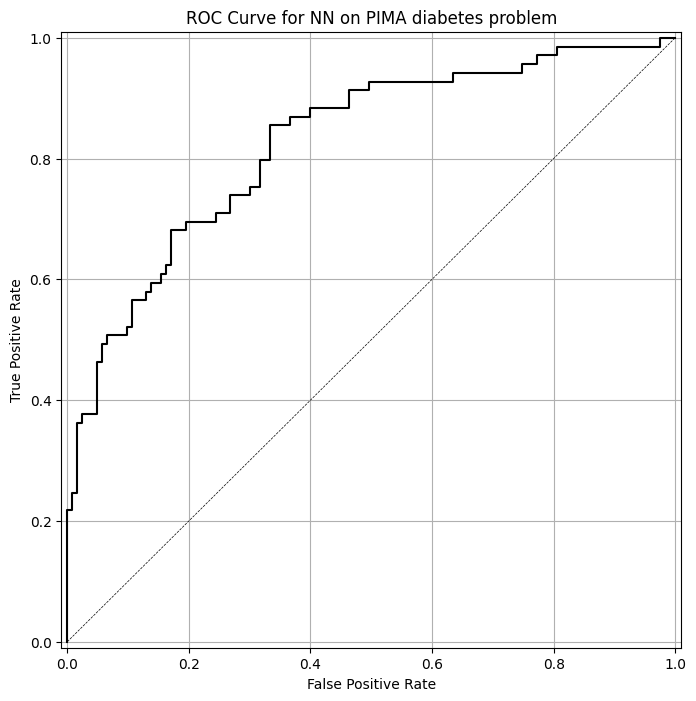

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss')

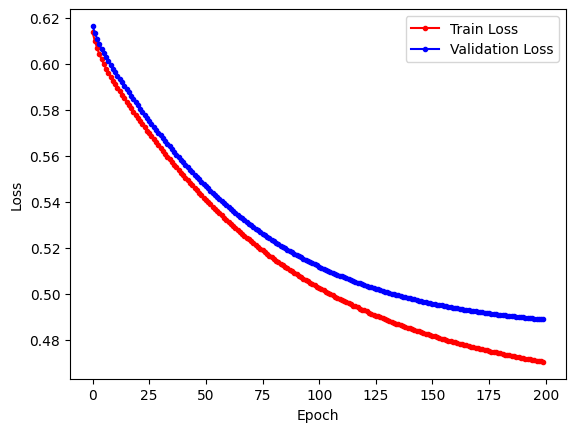

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

What is your interpretation about the result of the train and validation loss?

The 0 to 200 is the epoch and the vertical axis symbolize the loss. Meaning as we train the model it's loss is getting smaller and smaller. The training loss reflects how well the model is fitting the training data. It should decrease over time as the model learns from the data. Which mean our model is improving in both training and validation data.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
filepath = "/content/drive/MyDrive/data sci 3 files/mounted files/kyphosis.csv"

df = pd.read_csv(filepath);


# Print the first rows of the pandas DataFrame.
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
df['Kyphosis'] = df['Kyphosis'].apply(lambda x: 1 if x=="present" else 0)

In [ ]:
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
X = df.iloc[:, 1:].values
y = df["Kyphosis"].values

In [ ]:
X

array([[ 71,   3,   5],
       [158,   3,  14],
       [128,   4,   5],
       [  2,   5,   1],
       [  1,   4,  15],
       [  1,   2,  16],
       [ 61,   2,  17],
       [ 37,   3,  16],
       [113,   2,  16],
       [ 59,   6,  12],
       [ 82,   5,  14],
       [148,   3,  16],
       [ 18,   5,   2],
       [  1,   4,  12],
       [168,   3,  18],
       [  1,   3,  16],
       [ 78,   6,  15],
       [175,   5,  13],
       [ 80,   5,  16],
       [ 27,   4,   9],
       [ 22,   2,  16],
       [105,   6,   5],
       [ 96,   3,  12],
       [131,   2,   3],
       [ 15,   7,   2],
       [  9,   5,  13],
       [  8,   3,   6],
       [100,   3,  14],
       [  4,   3,  16],
       [151,   2,  16],
       [ 31,   3,  16],
       [125,   2,  11],
       [130,   5,  13],
       [112,   3,  16],
       [140,   5,  11],
       [ 93,   3,  16],
       [  1,   3,   9],
       [ 52,   5,   6],
       [ 20,   6,   9],
       [ 91,   5,  12],
       [ 73,   5,   1],
       [ 35,   3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.20987654320987653, 0.7901234567901234)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(3,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
2/2 [==============================] - 1s 329ms/step - loss: 0.5933 - accuracy: 0.8167 - val_loss: 0.5993 - val_accuracy: 0.7143
Epoch 2/1500
2/2 [==============================] - 0s 80ms/step - loss: 0.5899 - accuracy: 0.8167 - val_loss: 0.5969 - val_accuracy: 0.7143
Epoch 3/1500
2/2 [==============================] - 0s 65ms/step - loss: 0.5865 - accuracy: 0.8167 - val_loss: 0.5945 - val_accuracy: 0.7143
Epoch 4/1500
2/2 [==============================] - 0s 64ms/step - loss: 0.5833 - accuracy: 0.8167 - val_loss: 0.5922 - val_accuracy: 0.7143
Epoch 5/1500
2/2 [==============================] - 0s 91ms/step - loss: 0.5801 - accuracy: 0.8167 - val_loss: 0.5899 - val_accuracy: 0.7143
Epoch 6/1500
2/2 [==============================] - 0s 67ms/step - loss: 0.5770 - accuracy: 0.8167 - val_loss: 0.5875 - val_accuracy: 0.7143
Epoch 7/1500
2/2 [==============================] - 0s 33ms/step - loss: 0.5738 - accuracy: 0.8167 - val_loss: 0.5851 - val_accuracy: 0.7143
Epoch 8/1500

In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

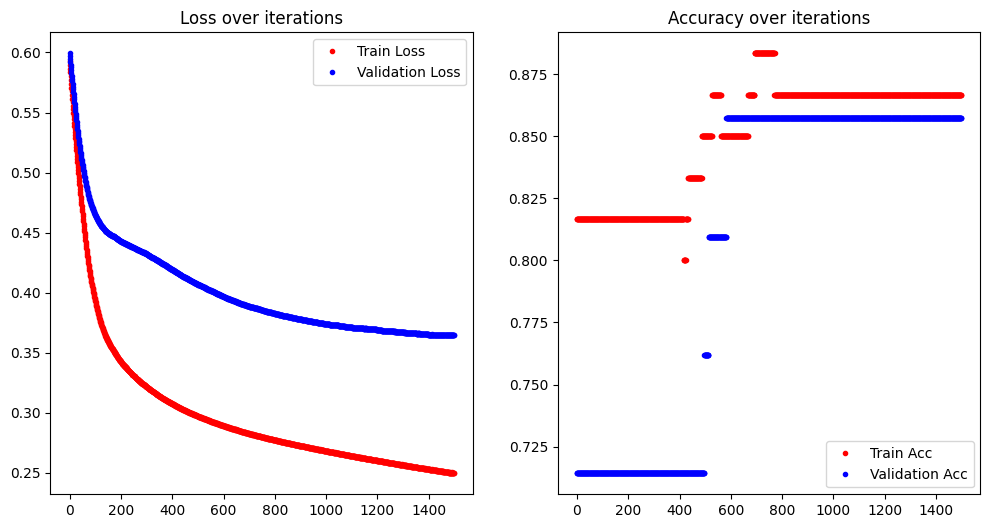

In [ ]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

1/1 [==============================] - 0s 19ms/step

accuracy is 0.857
roc-auc is 0.933


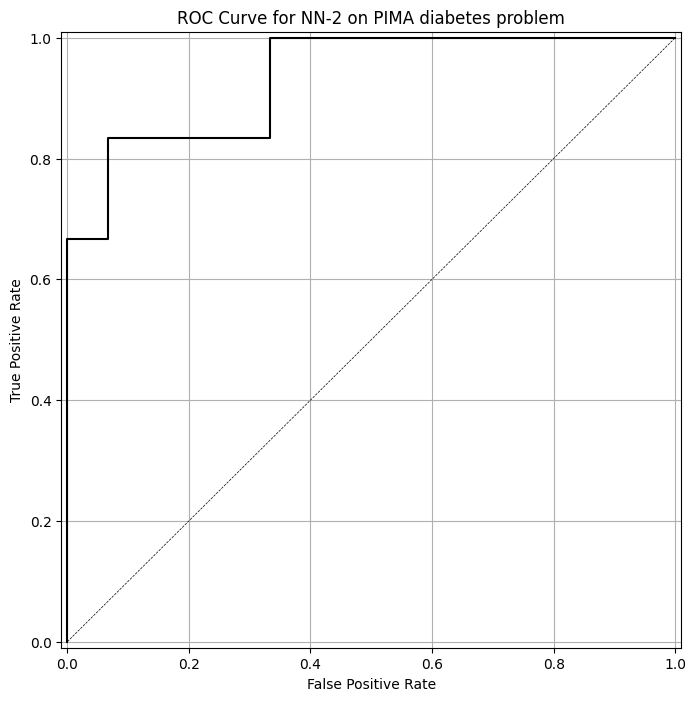

In [ ]:

y_pred_class_nn_2 = (model_2.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')

Epoch 1/800
2/2 [==============================] - 3s 511ms/step - loss: 0.7215 - accuracy: 0.2500 - val_loss: 0.7312 - val_accuracy: 0.2857
Epoch 2/800
2/2 [==============================] - 0s 60ms/step - loss: 0.7151 - accuracy: 0.4000 - val_loss: 0.7263 - val_accuracy: 0.4762
Epoch 3/800
2/2 [==============================] - 0s 66ms/step - loss: 0.7095 - accuracy: 0.6167 - val_loss: 0.7218 - val_accuracy: 0.4762
Epoch 4/800
2/2 [==============================] - 0s 68ms/step - loss: 0.7047 - accuracy: 0.6167 - val_loss: 0.7177 - val_accuracy: 0.4762
Epoch 5/800
2/2 [==============================] - 0s 78ms/step - loss: 0.7003 - accuracy: 0.6000 - val_loss: 0.7140 - val_accuracy: 0.4286
Epoch 6/800
2/2 [==============================] - 0s 97ms/step - loss: 0.6963 - accuracy: 0.6000 - val_loss: 0.7106 - val_accuracy: 0.4286
Epoch 7/800
2/2 [==============================] - 0s 135ms/step - loss: 0.6926 - accuracy: 0.6000 - val_loss: 0.7078 - val_accuracy: 0.4286
Epoch 8/800
2/2 [=

Text(0.5, 1.0, 'Loss over iterations')

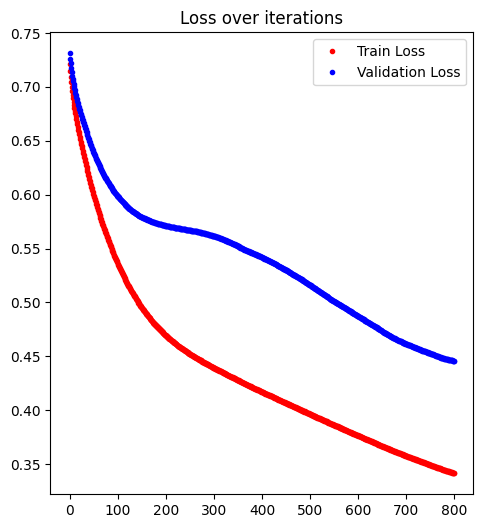

In [ ]:
model_3 = Sequential()
model_3.add(Dense(2, input_shape=(3,), activation="relu"))
model_3.add(Dense(3,  activation="relu"))
model_3.add(Dense(8,  activation="relu"))
model_3.add(Dense(3,  activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=800)

n = len(run_hist_3.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_3.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_3.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')


Epoch 1/500
2/2 [==============================] - 1s 191ms/step - loss: 1.0165 - accuracy: 0.2000 - val_loss: 0.8194 - val_accuracy: 0.4286
Epoch 2/500
2/2 [==============================] - 0s 29ms/step - loss: 0.9291 - accuracy: 0.2500 - val_loss: 0.7740 - val_accuracy: 0.4762
Epoch 3/500
2/2 [==============================] - 0s 30ms/step - loss: 0.8673 - accuracy: 0.2667 - val_loss: 0.7383 - val_accuracy: 0.5238
Epoch 4/500
2/2 [==============================] - 0s 28ms/step - loss: 0.8179 - accuracy: 0.3000 - val_loss: 0.7088 - val_accuracy: 0.5714
Epoch 5/500
2/2 [==============================] - 0s 28ms/step - loss: 0.7774 - accuracy: 0.3667 - val_loss: 0.6841 - val_accuracy: 0.5238
Epoch 6/500
2/2 [==============================] - 0s 48ms/step - loss: 0.7434 - accuracy: 0.4500 - val_loss: 0.6629 - val_accuracy: 0.5714
Epoch 7/500
2/2 [==============================] - 0s 32ms/step - loss: 0.7145 - accuracy: 0.5500 - val_loss: 0.6440 - val_accuracy: 0.5714
Epoch 8/500
2/2 [==

Text(0.5, 1.0, 'Loss over iterations')

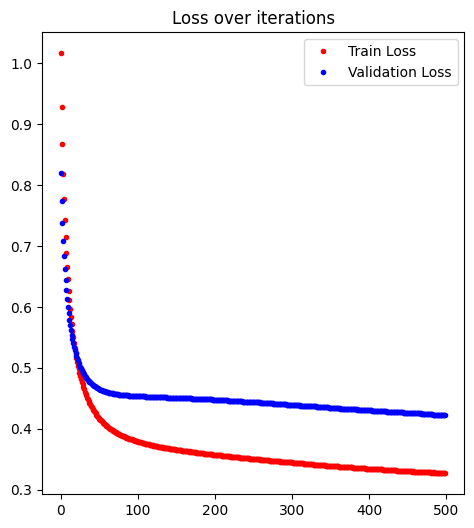

In [ ]:
model_4 = Sequential()
model_4.add(Dense(4, input_shape=(3,), activation="linear"))
model_4.add(Dense(3,  activation="gelu"))
model_4.add(Dense(4,  activation="mish"))
model_4.add(Dense(1, activation="softplus"))

model_4.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model_4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

n = len(run_hist_4.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_4.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_4.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

Text(0.5, 1.0, 'Loss over iterations')

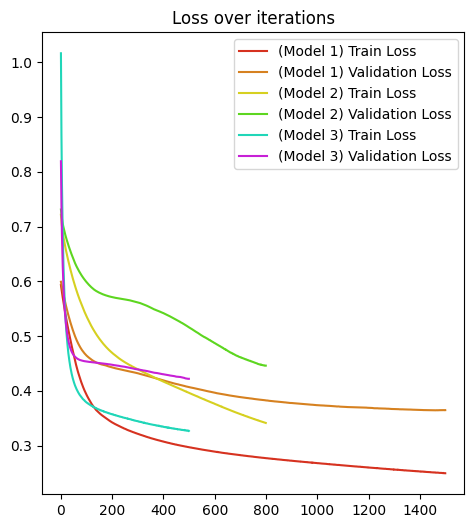

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)

n = len(run_hist_2.history["loss"])
ax.plot(range(n), (run_hist_2.history["loss"]),'#d63220', label="(Model 1) Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'#d68120', label="(Model 1) Validation Loss")
n = len(run_hist_3.history["loss"])
ax.plot(range(n), (run_hist_3.history["loss"]),'#d6d020', label="(Model 2) Train Loss")
ax.plot(range(n), (run_hist_3.history["val_loss"]),'#5dd620', label="(Model 2) Validation Loss")
n = len(run_hist_4.history["loss"])
ax.plot(range(n), (run_hist_4.history["loss"]),'#20d6b8', label="(Model 3) Train Loss")
ax.plot(range(n), (run_hist_4.history["val_loss"]),'#c720d6', label="(Model 3) Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

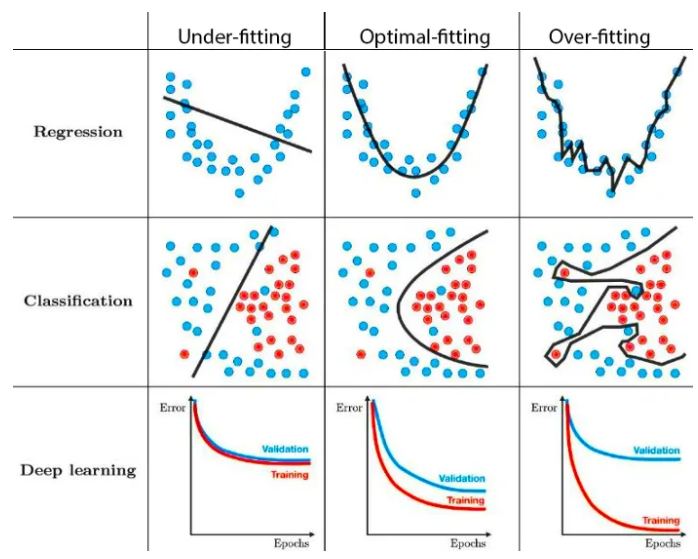

#### Conclusion

I was able to create a Neural networks using keras sequential model. I was able to customize the number of hidden layers, nodes, learning rate, epochs and activation function on each layer. From the 3 models that I have the one with the highest epoch performed the best. Although it is to take into consideration that they have different parameters such as activation function, number of hidden layers and nodes in each layer. But considering the graph's trend it is possible that the models with lower epoch will continue to improve if I increase the epoch.

#Collab Link

https://colab.research.google.com/drive/1BNj3_BFNB1pQZtQ397Y0HYHhAU5e777x?usp=sharing